<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Avaliação P1**

Empregue este notebook para fazer os códigos da sua avalição e não deixe de postar na tarefa correspondente. A entrega do notebook é obrigatória.

In [1729]:
#@markdown Informe **\<Matrícula, Nome\>** como abaixo:
Aluno = '19.02009-0, Renan Scheidt Reschke' #@param {type:"string"}




# **Imports e Path**

Empregue os `imports` e o `path` abaixo para acessar os arquivos solicitados na sua avaliação. Para acessar um arquivo referenciado no Moodl você poderá fazer:

```
df = pd.read_csv(path + 'arquivo_nome_do_arquivo')
```

In [1730]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

path = 'https://github.com/Rogerio-mack/work/raw/main/P1/'

#CONSTANTS
n = 1

#REG
LISTA_DROP_X_TRAIN_DF = ['Id number', 'receipt name', 'receipt', 'price']
COL_Y_REG = 'price'
COLUNAS_A_NORMALIZAR = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
LISTA_DROP_X_SAMPLE_REG = ['Id number', 'receipt name', 'receipt']

#CLASS
LISTA_DROP_X_TRAIN_DF_CLASS = ['Id number', 'receipt name', 'receipt', 'price', 'Type_of_glass']
LISTA_DROP_X_SAMPLE_CLASS = ['Id number', 'receipt name', 'receipt']
COL_Y_CLASS = 'Type_of_glass'

# **Bases de Dados Empregadas**



## `df_blood_<` $n$ `>.csv`, $n=1,2,3$

In [1731]:
df_blood = pd.read_csv(path + f'df_blood_{n}.csv')
df_blood.head(3)

,record,name,cpf,address,birthday,Gluconise,H2B4,H356,HB_A56,Adrino_posina,...,H278,Positron_L,Plate,Factor_risk,norm_gamma_type,Blood_type,Blood_Rh,Low_Risk,Medium_Risk,High_Risk
0,98539,Miguel Campos,51832697428,"Residencial Maysa Sales, 927\nFuncionários\n54...",2011-10-05,1324.8691,181.22,331.22,98.73,Clinical Done,...,5418.56,27.8961,NaN,5,1,AB,-,True,False,False
1,77708,Cauã Sales,24738519050,Vila Duarte\nVila Antena\n47878550 Nascimento ...,2003-02-06,877.6487,69.41,219.41,98.73,Uncovered,...,12763.75,35.2413,X,6,0,B,+,True,False,False
2,5192,Lorena Nascimento,76184293591,"Estrada Sales, 484\nVila Santa Monica 1ª Seção...",2020-02-01,894.3656,73.59,223.59,129.97,Capsuled,...,23.64,22.5011,B,0,0,A,+,False,True,False


## `df_train`

In [1732]:
df_train = pd.read_csv(path + 'df_train.csv')
df_train.head(3)

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,price
0,1,Arthur Nascimento,9009,1.52101,13.64,D,1.10,71.78,0.06,8.75,0.0,0.0,1,224.332845
1,2,Kamilly Lopes,13268,1.51761,13.89,D,1.36,72.73,0.48,7.83,0.0,0.0,1,225.943776
2,3,Yasmin da Costa,21037,1.51618,13.53,C,1.54,72.99,0.39,7.78,0.0,0.0,1,226.760162


In [1733]:
df_train_normalizado = df_train.copy()
for col in COLUNAS_A_NORMALIZAR:
  if df_train_normalizado[col].max() != 0:
    df_train_normalizado[col] = df_train_normalizado[col]/df_train_normalizado[col].max()

## `df_sample_reg_<` $n$ `>.csv`, $n=1,2,3$

In [1734]:
df_sample_reg = pd.read_csv(path + f'df_sample_reg_{n}.csv')
df_sample_reg.rename(columns = {'Type of glass': 'Type_of_glass'}, inplace=True)
df_sample_reg.head(3)

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,68,Davi Lucas Barros,17432,1.52152,13.05,D,0.87,72.32,0.19,9.85,0.0,0.17,1
1,104,Isaac Cavalcanti,29747,1.52725,13.80,B,0.66,70.57,0.08,11.64,0.0,0.00,2
2,118,Ana Lívia Pereira,21054,1.51708,13.72,D,1.81,72.06,0.64,7.88,0.0,0.00,2


In [1735]:
df_sample_reg_normalizado = df_sample_reg.copy()
for col in COLUNAS_A_NORMALIZAR:
  if df_sample_reg_normalizado[col].max() != 0:
    df_sample_reg_normalizado[col] = df_sample_reg_normalizado[col]/df_sample_reg_normalizado[col].max()

## `df_sample_class_<` $n$ `>.csv`, $n=1,2,3$

In [1736]:
df_sample_class = pd.read_csv(path + f'df_sample_class_{n}.csv')
df_sample_class.head(3)

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,10,Isaac Souza,4993,1.51755,13.00,D,1.36,72.99,0.57,8.40,0.0,0.11
1,104,Isaac Cavalcanti,29747,1.52725,13.80,B,0.66,70.57,0.08,11.64,0.0,0.00
2,202,Alícia Fernandes,9582,1.51653,11.95,A,1.19,75.18,2.70,8.93,0.0,0.00


In [1737]:
df_sample_class_normalizado = df_sample_class.copy()
for col in COLUNAS_A_NORMALIZAR:
  if df_sample_class_normalizado[col].max() != 0:
    df_sample_class_normalizado[col] = df_sample_class_normalizado[col]/df_sample_class_normalizado[col].max()

# **Questões**

Separe cada questão por uma célula de texto empregando a identificação da questão no Moodle como título. Exemplo:

# Q8D.

In [1738]:
# Código da questão Q8D.

# Util

In [1739]:
def limites(coluna):
    """
    Cálculo de limites inferior e superior para detecção de outliers
    """
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    """
    Exclusão de outliers de uma coluna de um DataFrame
    """
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

def diagrama_caixa(coluna, titulo, xlabel,fontsize_axis, fontsize_title, img_name=None):
    """
    Diagrama de caixa para visualização de outliers
    """
    if img_name is None:
        img_name = "box_"+titulo.replace(' ', '_')+".png"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    fig.suptitle(titulo, fontsize=fontsize_title)
    ax1.set_xlabel(xlabel, fontsize=fontsize_axis)
    ax2.set_xlabel(xlabel, fontsize=fontsize_axis)
    ax1.set_title('Com outliers', fontsize=fontsize_title)
    ax2.set_title('Sem outliers', fontsize=fontsize_title)
    fig.savefig(img_name, transparent=True)
    plt.show()

def histograma(coluna, titulo, xlabel, ylabel, fontsize_axis, fontsize_title, img_name=None):
    """
    Histograma para visualização de distribuição de dados
    """
    if img_name is None:
        img_name = "hist_"+titulo.replace(' ', '_')+".png"
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    sns.distplot(coluna, hist=False, ax=ax)
    media=coluna.mean()
    ax.axvline(media, color='r', linestyle='--', linewidth=1, label='Média')
    plt.text(media, ax.get_ylim()[1]*0.9, f'Média = {media:.2f}', ha='center', va='center', color='r', rotation=0)
    ax.set_xlabel(xlabel, fontsize=fontsize_axis)
    ax.set_ylabel(ylabel, fontsize=fontsize_axis)
    ax.set_title(titulo, fontsize=fontsize_title)
    fig.savefig(img_name, transparent=True)
    plt.show()

def grafico_barra(coluna, titulo, xlabel, ylabel, fontsize_axis, fontsize_title, fontsize_x, rotation_x=0, quantidades=False, img_name=None):
    """
    Gráfico de barras para visualização de distribuição de dados
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    if img_name is None:
        img_name = "bar_"+titulo.replace(' ', '_')+".png"
    plot = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts(), ax=ax)
    ax.set_xlabel(xlabel, fontsize=fontsize_axis)
    ax.set_ylabel(ylabel, fontsize=fontsize_axis)
    ax.set_title(titulo, fontsize=fontsize_title)
    ax.tick_params(axis='x', rotation=rotation_x, labelsize=fontsize_x)
    qt_x = len(coluna.value_counts().index)
    if qt_x > 20:
        passo = int(np.ceil(qt_x / 20))
        ax.set_xticks(range(0, qt_x, passo))

    if quantidades:
        total = len(coluna)
        for bar in plot.patches:
            plot.annotate(f'{bar.get_height():.0f} ({(bar.get_height()/total)*100:.2f}%)',
                        (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                        size=8, xytext=(0, 8),
                        textcoords='offset points')
    fig.savefig(img_name, transparent=True)
    plt.show()

def agrupar_categorias(df, coluna, qtd_min_por_categoria):
    """
    Agrupamento de categorias com baixa frequência
    """
    categorias = df[coluna].value_counts()
    categoarias_a_agrupar = []

    for categoria in categorias.index:
        if categorias[categoria] < qtd_min_por_categoria:
            categoarias_a_agrupar.append(categoria)

    for categoria in categoarias_a_agrupar:
        df.loc[df[coluna]==categoria, coluna] = 'Outros'

    return df

# Manipulações

## df_blood

In [1740]:
resumo = df_blood.describe()

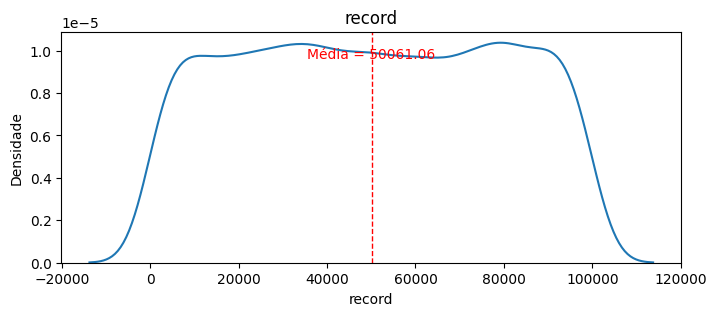

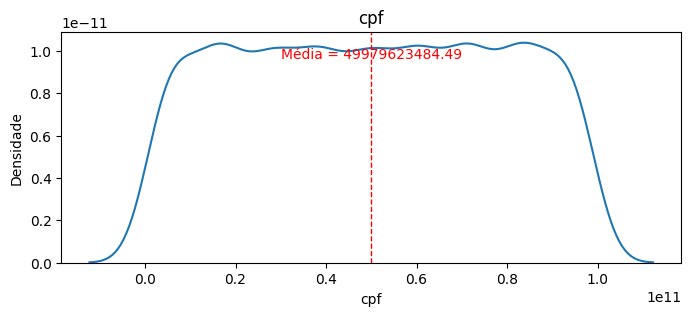

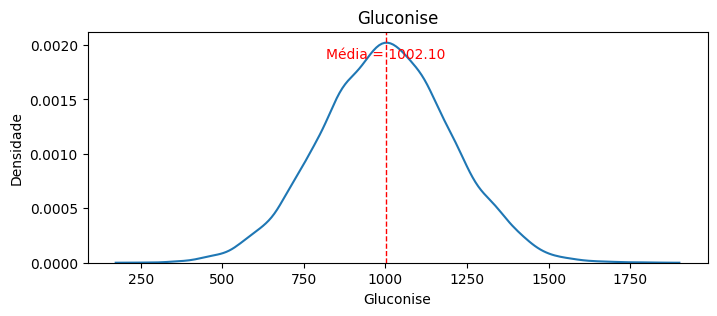

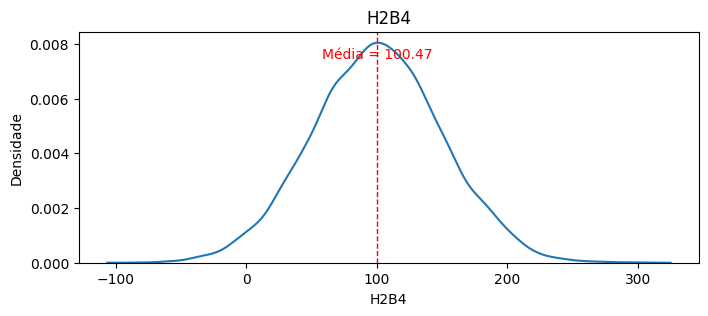

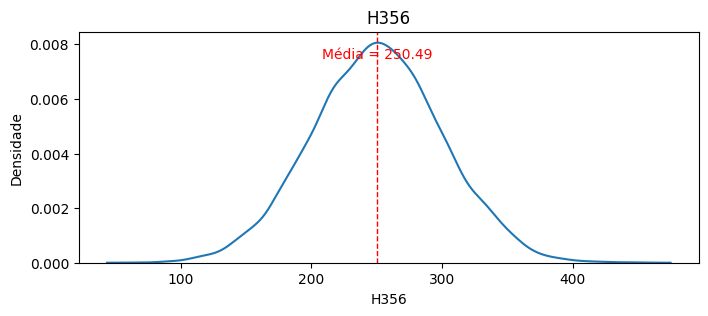

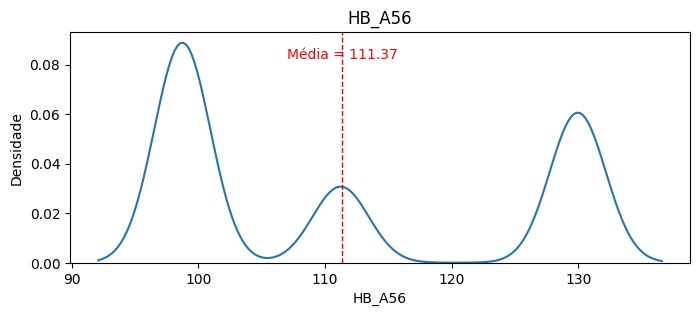

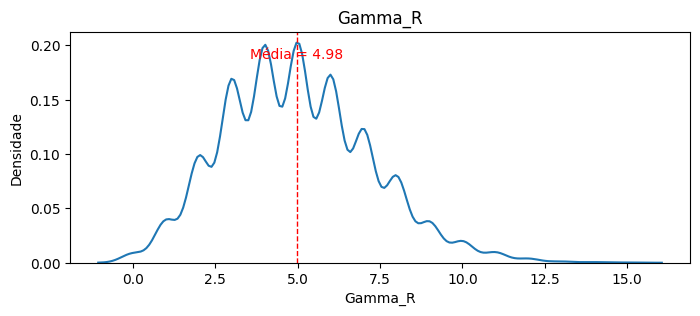

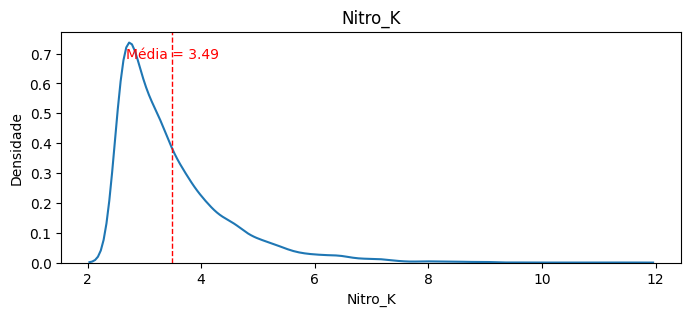

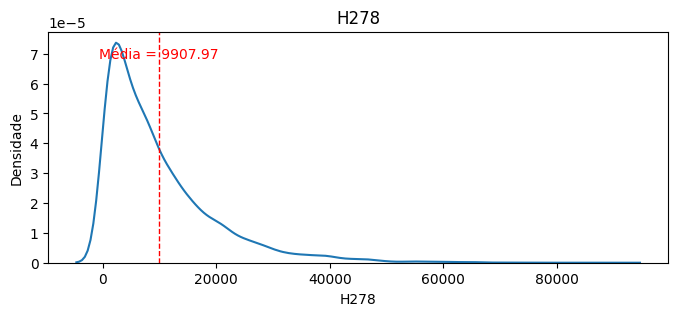

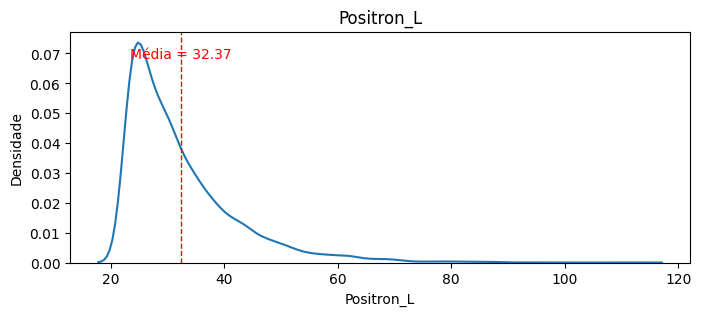

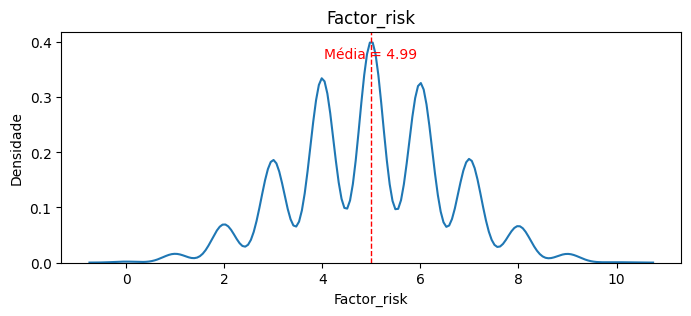

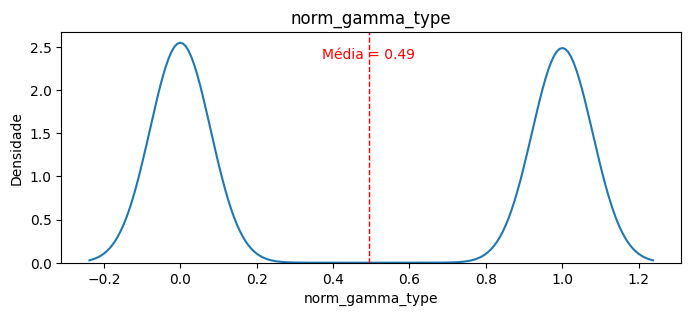

In [1741]:
for col in resumo.columns:
  histograma(df_blood[col], f'{col}', f'{col}', 'Densidade', 10, 12)

## df_sample_reg

### Sumário dos dados

In [1742]:
df_sample_reg.describe()

,Id number,receipt,RI,Na,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000
mean,96.666667,22744.333333,1.521950,13.523333,1.113333,71.650000,0.303333,9.790000,0.0,0.056667,1.666667
std,25.794056,6329.117342,0.005099,0.411866,0.612400,0.944299,0.296704,1.880718,0.0,0.098150,0.577350
min,68.000000,17432.000000,1.517080,13.050000,0.660000,70.570000,0.080000,7.880000,0.0,0.000000,1.000000
25%,86.000000,19243.000000,1.519300,13.385000,0.765000,71.315000,0.135000,8.865000,0.0,0.000000,1.500000
50%,104.000000,21054.000000,1.521520,13.720000,0.870000,72.060000,0.190000,9.850000,0.0,0.000000,2.000000
75%,111.000000,25400.500000,1.524385,13.760000,1.340000,72.190000,0.415000,10.745000,0.0,0.085000,2.000000
max,118.000000,29747.000000,1.527250,13.800000,1.810000,72.320000,0.640000,11.640000,0.0,0.170000,2.000000


In [1743]:
print(df_train_normalizado.isnull().sum())

Id number        0
receipt name     0
receipt          0
RI               3
Na               0
Mg               0
Al               0
Si               2
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
price            5
dtype: int64


In [1744]:
df_train_normalizado.dropna(inplace=True)
df_train.dropna(inplace=True)

### Encoding

In [1745]:
print(df_train.Mg.unique())

map_Mg_to_int = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3
}

df_train.Mg.replace(map_Mg_to_int, inplace= True)
df_sample_class.Mg.replace(map_Mg_to_int, inplace= True)
df_train_normalizado.Mg.replace(map_Mg_to_int, inplace= True)
df_sample_reg_normalizado.Mg.replace(map_Mg_to_int, inplace= True)
df_sample_class_normalizado.Mg.replace(map_Mg_to_int, inplace= True)

['D' 'C' 'B' 'A']


### Test split

In [1746]:
X_reg = df_train_normalizado.drop(LISTA_DROP_X_TRAIN_DF, axis = 1)
X_reg = X_reg/X_reg.max()
y_reg = df_train_normalizado[COL_Y_REG]

random_state = 42
test_size = 0.30

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=test_size, random_state=random_state)

### Treinar com Regressão Linear

In [1747]:
modelo_lr = LinearRegression()
# Treina o modelo
modelo_lr.fit(X_train_reg, y_train_reg)

# R2 do modelo
score = modelo_lr.score(X_test_reg, y_test_reg)

print(f'R2: {score:.10f}\n')

R2: 0.9219156330



In [1748]:
modelo_lr.coef_

array([ 5.97619693e+00,  7.00433127e+00,  1.07822909e-01,  3.57574276e-01,
        1.31535967e+02,  4.63566691e-01, -5.39324759e+00, -1.24709447e-01,
        9.64305388e-02, -9.70953564e-02])

### Prever Linear

In [1749]:
X_pred = df_sample_reg_normalizado.drop(LISTA_DROP_X_SAMPLE_REG, axis = 1)
X_reg_pred = df_train_normalizado.drop(LISTA_DROP_X_TRAIN_DF, axis = 1)
X_pred = X_pred/X_reg_pred.max()
y_pred_reg_linear = modelo_lr.predict(X_pred)

df_result_reg = df_sample_reg_normalizado.copy()
df_result_reg[COL_Y_REG] = y_pred_reg_linear

df_result_reg.head()

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,price
0,68,Davi Lucas Barros,17432,0.996248,0.945652,3,0.480663,1.000000,0.296875,0.846220,0.0,1.0,1,228.019715
1,104,Isaac Cavalcanti,29747,1.000000,1.000000,1,0.364641,0.975802,0.125000,1.000000,0.0,0.0,2,224.038988
2,118,Ana Lívia Pereira,21054,0.993341,0.994203,3,1.000000,0.996405,1.000000,0.676976,0.0,0.0,2,229.258685


### Treinar com ols

In [1750]:
# Definição do modelo
lm = sm.ols(formula='price ~ RI + Mg + Na + Al + Si + K + Ca + Ba + Fe + Type_of_glass', data=df_train_normalizado)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

print(f"R2 = {lm.rsquared}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.1
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          9.74e-116
Time:                        02:56:54   Log-Likelihood:                -19.072
No. Observations:                 191   AIC:                             60.14
Df Residuals:                     180   BIC:                             95.92
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        56.3891     34.189      1.649

### Prever com ols

In [1751]:
X_pred = df_sample_reg_normalizado.drop(LISTA_DROP_X_SAMPLE_REG, axis = 1)
X_reg_pred = df_train_normalizado.drop(LISTA_DROP_X_TRAIN_DF, axis = 1)
y_pred_ols = modelo_lr.predict(X_pred)

df_result_ols = df_sample_reg_normalizado.copy()
df_result_ols[COL_Y_REG] = y_pred_ols

df_result_ols.head()

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,price
0,68,Davi Lucas Barros,17432,0.996248,0.945652,3,0.480663,1.000000,0.296875,0.846220,0.0,1.0,1,228.527374
1,104,Isaac Cavalcanti,29747,1.000000,1.000000,1,0.364641,0.975802,0.125000,1.000000,0.0,0.0,2,224.387850
2,118,Ana Lívia Pereira,21054,0.993341,0.994203,3,1.000000,0.996405,1.000000,0.676976,0.0,0.0,2,229.608072


## df_sample_class

In [1752]:
df_sample_class.describe()

,Id number,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000
mean,105.333333,14774.00000,1.520443,12.916667,1.333333,1.070000,72.913333,1.116667,9.656667,0.0,0.036667
std,96.006944,13168.43867,0.005917,0.927811,1.527525,0.365103,2.305956,1.392923,1.737939,0.0,0.063509
min,10.000000,4993.00000,1.516530,11.950000,0.000000,0.660000,70.570000,0.080000,8.400000,0.0,0.000000
25%,57.000000,7287.50000,1.517040,12.475000,0.500000,0.925000,71.780000,0.325000,8.665000,0.0,0.000000
50%,104.000000,9582.00000,1.517550,13.000000,1.000000,1.190000,72.990000,0.570000,8.930000,0.0,0.000000
75%,153.000000,19664.50000,1.522400,13.400000,2.000000,1.275000,74.085000,1.635000,10.285000,0.0,0.055000
max,202.000000,29747.00000,1.527250,13.800000,3.000000,1.360000,75.180000,2.700000,11.640000,0.0,0.110000


In [1753]:
X_class = df_train.drop(LISTA_DROP_X_TRAIN_DF_CLASS, axis = 1)
y_class = df_train[COL_Y_CLASS]

In [1754]:
random_state = 42
test_size = 0.30
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=test_size, random_state=random_state)

### Regressão Logística

In [1755]:
clf = LogisticRegression()

clf.fit(X_train_class, y_train_class)

LogisticRegression()

In [1774]:
print(f'Score: {clf.score(X_test_class, y_test_class):.3f}')

Score: 0.500


In [1756]:
y_pred_class = clf.predict(X_test_class)

cm = confusion_matrix(y_test_class, y_pred_class)
print('\nMatriz de Confusão:\n')
print(cm)
print()

cm_df = pd.DataFrame(cm,index=[clf.classes_],columns=[clf.classes_])
display(cm_df)
print()

accuracy = accuracy_score(y_test_class, y_pred_class)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.4f}')

accuracy = clf.score(X_test_class, y_test_class)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.4f}')

print('\nClassification Report:\n')
print(classification_report(y_test_class, y_pred_class))


Matriz de Confusão:

[[ 8 11  0  0  0]
 [ 5 13  2  1  1]
 [ 2  1  0  0  0]
 [ 0  5  0  1  1]
 [ 0  0  0  0  7]]



,1,2,3,5,7
1,8,11,0,0,0
2,5,13,2,1,1
3,2,1,0,0,0
5,0,5,0,1,1
7,0,0,0,0,7




Score de Acuracidade (1):

0.5000

Score de Acuracidade (2):

0.5000

Classification Report:

              precision    recall  f1-score   support

           1       0.53      0.42      0.47        19
           2       0.43      0.59      0.50        22
           3       0.00      0.00      0.00         3
           5       0.50      0.14      0.22         7
           7       0.78      1.00      0.88         7

    accuracy                           0.50        58
   macro avg       0.45      0.43      0.41        58
weighted avg       0.49      0.50      0.48        58



In [1757]:
X_pred = df_sample_class.drop(LISTA_DROP_X_SAMPLE_CLASS, axis = 1)
y_pred_class = clf.predict(X_pred)

df_result_log = df_sample_class.copy()
df_result_log[COL_Y_CLASS] = y_pred_class

df_result_log.head()

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,10,Isaac Souza,4993,1.51755,13.00,3,1.36,72.99,0.57,8.40,0.0,0.11,2
1,104,Isaac Cavalcanti,29747,1.52725,13.80,1,0.66,70.57,0.08,11.64,0.0,0.00,1
2,202,Alícia Fernandes,9582,1.51653,11.95,0,1.19,75.18,2.70,8.93,0.0,0.00,5


### KNN

In [1758]:
k = 3

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_class, y_train_class)

KNeighborsClassifier(n_neighbors=3)

In [1759]:
print(f'Score: {model.score(X_test_class, y_test_class):.3f}')

Score: 0.690


In [1760]:
y_pred_class = model.predict(X_test_class)

cm = confusion_matrix(y_test_class, y_pred_class)
print('\nMatriz de Confusão:\n')
print(cm)
print()

cm_df = pd.DataFrame(cm,index=[model.classes_],columns=[model.classes_])
display(cm_df)
print()

accuracy = accuracy_score(y_test_class, y_pred_class)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.4f}')

accuracy = model.score(X_test_class, y_test_class)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.4f}')

print('\nClassification Report:\n')
print(classification_report(y_test_class, y_pred_class))


Matriz de Confusão:

[[11  4  4  0  0]
 [ 1 19  0  2  0]
 [ 3  0  0  0  0]
 [ 1  0  0  5  1]
 [ 1  1  0  0  5]]



,1,2,3,5,7
1,11,4,4,0,0
2,1,19,0,2,0
3,3,0,0,0,0
5,1,0,0,5,1
7,1,1,0,0,5




Score de Acuracidade (1):

0.6897

Score de Acuracidade (2):

0.6897

Classification Report:

              precision    recall  f1-score   support

           1       0.65      0.58      0.61        19
           2       0.79      0.86      0.83        22
           3       0.00      0.00      0.00         3
           5       0.71      0.71      0.71         7
           7       0.83      0.71      0.77         7

    accuracy                           0.69        58
   macro avg       0.60      0.57      0.58        58
weighted avg       0.70      0.69      0.69        58



In [1761]:
X_pred = df_sample_class.drop(LISTA_DROP_X_SAMPLE_CLASS, axis = 1)
y_pred_class = model.predict(X_pred)

df_result_knn = df_sample_class.copy()
df_result_knn[COL_Y_CLASS] = y_pred_class

df_result_knn.head()

,Id number,receipt name,receipt,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,10,Isaac Souza,4993,1.51755,13.00,3,1.36,72.99,0.57,8.40,0.0,0.11,2
1,104,Isaac Cavalcanti,29747,1.52725,13.80,1,0.66,70.57,0.08,11.64,0.0,0.00,2
2,202,Alícia Fernandes,9582,1.51653,11.95,0,1.19,75.18,2.70,8.93,0.0,0.00,2


# Q1.

In [1762]:
# Código da questão 1

# Q2.

In [1763]:
# Código da questão 2

# Q3.

In [1764]:
# Código da questão 3

# Q4.

In [1765]:
# Código da questão 4

# Q5.

In [1766]:
# Código da questão 5

# Q6.

In [1767]:
# Código da questão 6

# Q7.

In [1768]:
# Código da questão 7

# Q8.

In [1769]:
# códigos para a questão Q8

# Q9

In [1770]:
# Código da questão 9

# Q10

In [1771]:
# Código da questão 10

# Q11

In [1772]:
# Código da questão 11

# Q12

In [1773]:
# Código da questão 12